# Problem Set 2
Bethany Bailey

## Intro to Matplotlib

In [224]:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1

In [86]:
def stats(n):
    ar = np.random.normal(size=(n, n))
    mean = np.mean(ar, axis=1)
    var = np.var(mean)
    return var

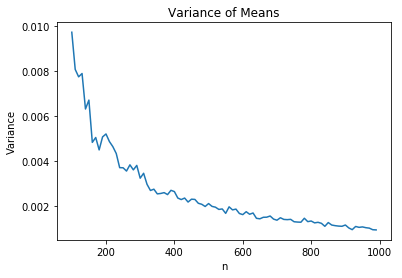

In [89]:
def stats_plot():
    n = np.arange(100, 1000, 10)
    results = np.zeros(len(n))
    for index, num in enumerate(n):
        results[index] = stats(int(num))
    plt.plot(n, results)
    plt.title("Variance of Means")
    plt.xlabel("n")
    plt.ylabel("Variance")
    plt.show()   
    
stats_plot()

### Problem 2

In [90]:
def plot_functions():
    x = np.linspace(-2*np.pi, 2*np.pi, 100);
    sin = np.sin(x)
    cos = np.cos(x)
    arctan = np.arctan(x)
    plt.plot(x, sin, x, cos, x, arctan)
    plt.title("Functions")
    plt.legend()
    plt.show()

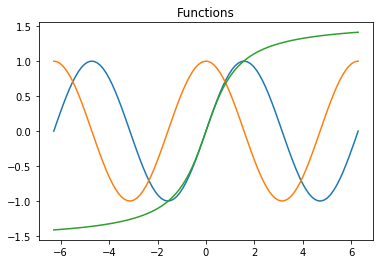

In [91]:
plot_functions()

### Problem 3

In [94]:
def curve():
    domain1 = np.linspace(-2, .99, 300)
    domain2 = np.linspace(1.01, 6, 500)
    f = lambda x: (1 / (x - 1))
    plt.plot(domain1, f(domain1), "m--", linewidth=4)
    plt.plot(domain2, f(domain2), "m--", linewidth=4) 
    plt.xlim(-2,6)
    plt.ylim(-6,6)

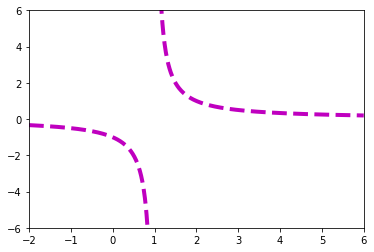

In [95]:
curve()

### Problem 4

In [100]:
def functions_2():
    plt.figure(figsize=(12,12))
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
    x = np.linspace(0, 2 * np.pi, 1000)
    axes[0,0].plot(x, np.sin(x), "g-")
    axes[0,0].set_title("$sin(x)$")
    axes[0,1].plot(x, np.sin(2 * x), "r--")
    axes[0,1].set_title("$sin(2x)$")
    axes[1,0].plot(x, 2 * np.sin(x), "b--")
    axes[1,0].set_title("$2sin(x)$")
    axes[1,1].plot(x, 2 * np.sin(2 * x), "m:")
    axes[1,1].set_title("$2sin(2x)$")
    plt.axis([0, 2 * np.pi, -2, 2])
    plt.suptitle("Plots of Trig Functions")
    plt.show()

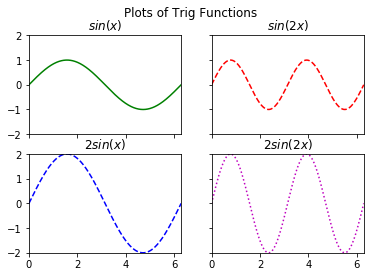

In [101]:
functions_2()

### Problem 5

In [114]:
def fars():
    df = np.load("FARS.npy")
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(2,2,1)
    ax1.plot(df[:,1], df[:,2], 'k,')
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax2 = plt.subplot(2,2,2)
    ax2.hist(df[:,0], bins=20)
    ax2.set_xlabel("Hour")
    ax2.set_ylabel("Number of Accidents")
    plt.show()

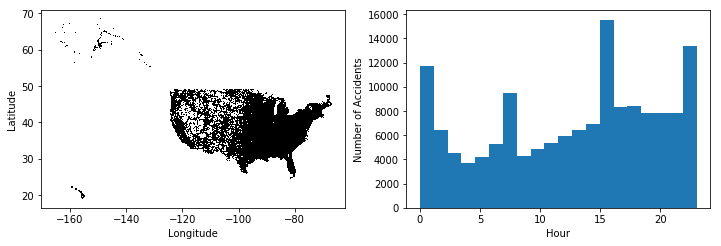

In [115]:
fars()

### Problem 6

In [118]:
def g_xy():
    plt.figure(figsize=(12,12))
    x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    y = x.copy()
    X, Y = np.meshgrid(x, y)
    G = (np.sin(X) * np.sin(Y)) / (X * Y)

    plt.subplot(2, 2, 1)
    plt.pcolormesh(X, Y, G, cmap="viridis")
    plt.colorbar()
    
    plt.subplot(2, 2, 2)
    plt.contour(X, Y, G, 10, cmap="magma")
    plt.colorbar()
    
    plt.axis([-2 * np.pi, 2 * np.pi, -2 * np.pi, 2 * np.pi])
    plt.show()

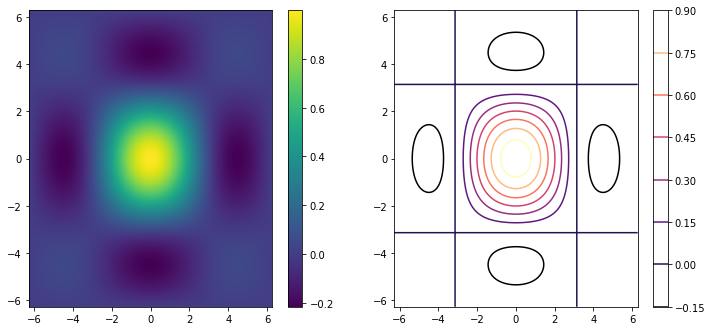

In [119]:
g_xy()

## Data Visualization

### Problem 1

In [127]:
df = np.load("anscombe.npy")
df

array([[ 10.  ,   8.04,  10.  ,   9.14,  10.  ,   7.46,   8.  ,   6.58],
       [  8.  ,   6.95,   8.  ,   8.14,   8.  ,   6.77,   8.  ,   5.76],
       [ 13.  ,   7.58,  13.  ,   8.74,  13.  ,  12.74,   8.  ,   7.71],
       [  9.  ,   8.81,   9.  ,   8.77,   9.  ,   7.11,   8.  ,   8.84],
       [ 11.  ,   8.33,  11.  ,   9.26,  11.  ,   7.81,   8.  ,   8.47],
       [ 14.  ,   9.96,  14.  ,   8.1 ,  14.  ,   8.84,   8.  ,   7.04],
       [  6.  ,   7.24,   6.  ,   6.13,   6.  ,   6.08,   8.  ,   5.25],
       [  4.  ,   4.26,   4.  ,   3.1 ,   4.  ,   5.39,  19.  ,  12.5 ],
       [ 12.  ,  10.84,  12.  ,   9.13,  12.  ,   8.15,   8.  ,   5.56],
       [  7.  ,   4.82,   7.  ,   7.26,   7.  ,   6.42,   8.  ,   7.91],
       [  5.  ,   5.68,   5.  ,   4.74,   5.  ,   5.73,   8.  ,   6.89]])

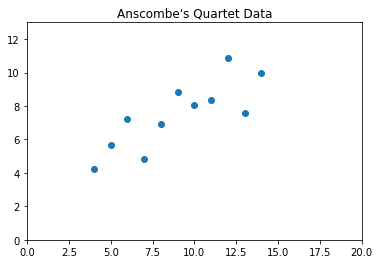

In [128]:
plt.scatter(df[:,0], df[:,1])
plt.axis([0, 20, 0, 13])
plt.title("Anscombe's Quartet Data")
plt.show()

In [129]:
from scipy import stats
stats.linregress(df[:,0],df[:,1])

LinregressResult(slope=0.50009090909090914, intercept=3.0000909090909103, rvalue=0.81642051634483992, pvalue=0.0021696288730787901, stderr=0.11790550059563408)

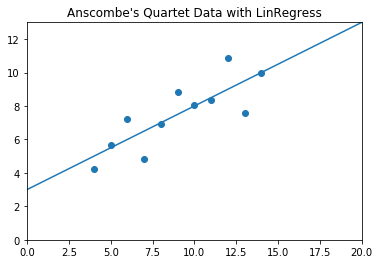

In [130]:
plt.scatter(df[:,0], df[:,1])
x = np.linspace(0,20)
y = 3.0 + 0.5 * x
plt.plot(x,y)
plt.axis([0, 20, 0, 13])
plt.title("Anscombe's Quartet Data with LinRegress")
plt.show()

### Problem 2

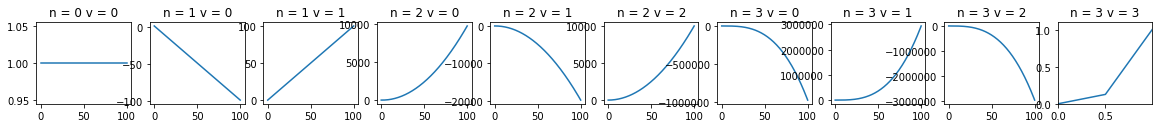

In [145]:
from scipy import special

fig, axes = plt.subplots(1,10, figsize=(20, 1.5))

axes = axes.ravel()

x = np.linspace(0,100,200)

def bernstein(x):
    i = 0
    for n in range(0,4):
        for v in range(0,n+1):
            y = special.binom(n, v) * (x ** v) * (1 - x) ** (n - v)
            axes[i].plot(x, y)
            title = "n = " + str(n) + " v = "+str(v)
            axes[i].set_title(title)
            i+=1
bernstein(x)
plt.axis([0, 1, 0, 1.1])
plt.xticks(np.arange(0, 1, step=0.5))
plt.show()

### Problem 3

In [147]:
data = np.load('MLB.npy')

In [148]:
data

array([[  74.  ,  180.  ,   22.99],
       [  74.  ,  215.  ,   34.69],
       [  72.  ,  210.  ,   30.78],
       ..., 
       [  75.  ,  205.  ,   25.19],
       [  75.  ,  190.  ,   31.01],
       [  73.  ,  195.  ,   27.92]])

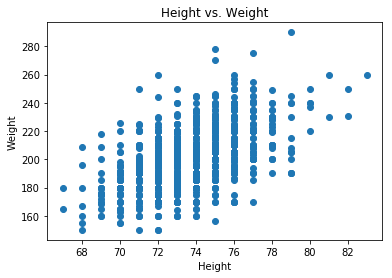

In [151]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight")
plt.show()

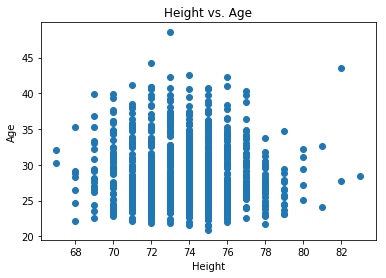

In [154]:
plt.scatter(data[:,0], data[:,2])
plt.xlabel("Height")
plt.ylabel("Age")
plt.title("Height vs. Age")
plt.show()

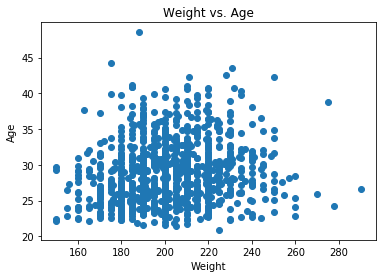

In [155]:
plt.scatter(data[:,1], data[:,2])
plt.xlabel("Weight")
plt.ylabel("Age")
plt.title("Weight vs. Age")
plt.show()

In [157]:
stats.linregress(data[:,0], data[:,1])

LinregressResult(slope=4.8410589649834472, intercept=-155.091636072754, rvalue=0.53188586302700303, pvalue=1.6552817721657604e-76, stderr=0.24003892606815208)

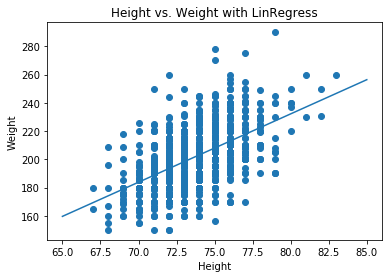

In [159]:
plt.scatter(data[:,0], data[:,1])
x = np.linspace(65, 85, 100)
y = -155.0916 + (4.84105896) * x
plt.plot(x, y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight with LinRegress")
plt.show()

### Problem 4

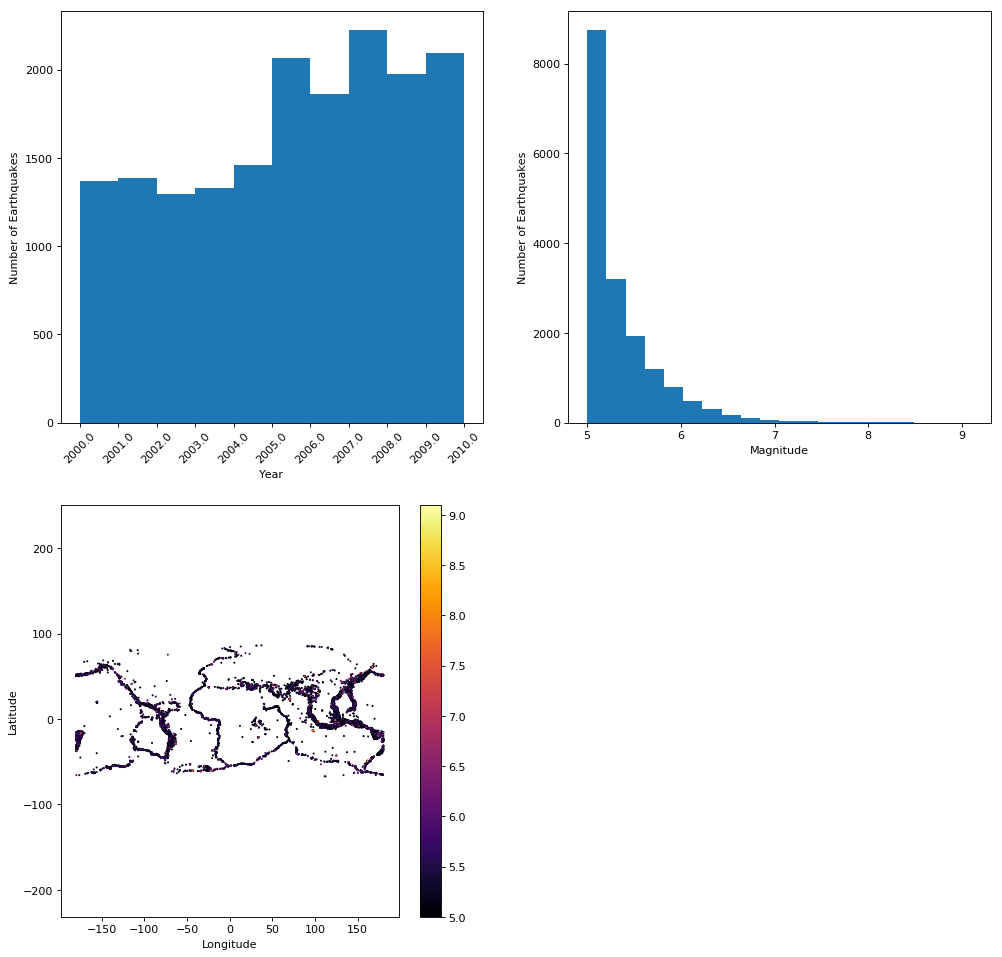

In [185]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T
fig = plt.figure(figsize=(15, 15), dpi= 80)
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0))

# Histogram of earthquakes by year
years = np.linspace(2000, 2010, 11)
ax1.hist(year, bins = years)
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Earthquakes")

# Histogram of strong vs. weak earthquakes
ax2.hist(magnitude, bins=20)
ax2.set_xlabel("Magnitude")
ax2.set_ylabel("Number of Earthquakes")

# Plot of where quakes happen (around fault lines)
plt.scatter(longitude, latitude, s=.7, cmap = "inferno", c = magnitude,)
plt.colorbar()
plt.axis("equal")
ax3.set_xlabel("Longitude")
ax3.set_ylabel("Latitude")

plt.show()

### Problem 5

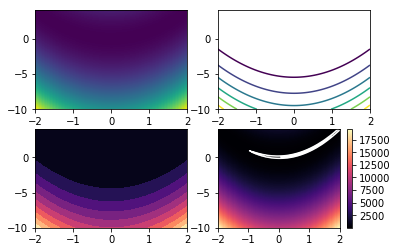

In [207]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-10, 4, 100)
X, Y = np.meshgrid(x, y)
Z = (1 - X) ** 2 + 100 * (Y - X ** 2) ** 2

# Plot f using a heat map, a contour map, and a filled contour map.
fig, ax = plt.subplots(2,2)

ax[0,0].pcolormesh(X, Y, Z, cmap="viridis")
ax[0,1].contour(X, Y, Z, 6, cmap="viridis")
ax[1,0].contourf(X, Y, Z, 12, cmap="magma")

# Plot specific level curves and a heat map with a colorbar.
ax[1,1].contour(X, Y, Z, [-1, -.25, 0, .25, 1, 4], colors="white")
cax = ax[1,1].pcolormesh(X, Y, Z, cmap="magma")
fig.colorbar(cax, ax=ax[1,1])
plt.show()

### Problem 6

In [209]:
data = np.load("countries.npy")
stats.linregress(data[:,0], data[:,1])

LinregressResult(slope=5.1067203303471738, intercept=1383.4231384396867, rvalue=0.46566035847507192, pvalue=0.03852853815924117, stderr=2.2875043146272311)

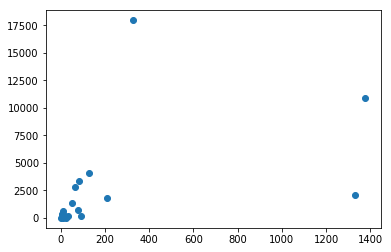

In [212]:
plt.scatter(data[:,0], data[:,1])
plt.show()

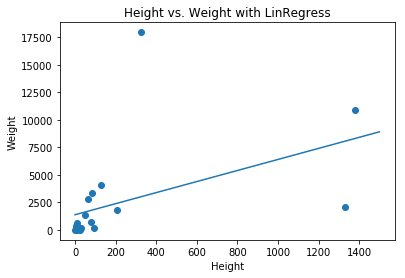

In [213]:
plt.scatter(data[:,0], data[:,1])
x = np.linspace(0, 1500, 1000)
y = 1383.423138 + (5.0167) * x
plt.plot(x, y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs. Weight with LinRegress")
plt.show()

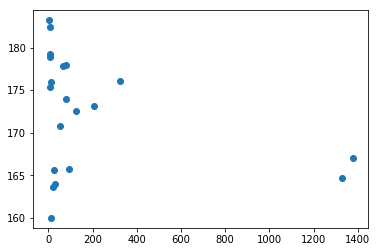

In [215]:
plt.scatter(data[:,0], data[:,2])
plt.show()

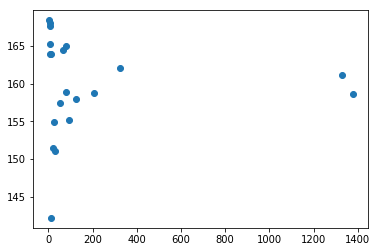

In [214]:
plt.scatter(data[:,0], data[:,3])
plt.show()

(array([ 1.,  0.,  2.,  3.,  1.,  0.,  1.,  0.,  2.,  2.,  2.,  2.,  2.,
         0.,  2.]),
 array([ 160.        ,  161.54666667,  163.09333333,  164.64      ,
         166.18666667,  167.73333333,  169.28      ,  170.82666667,
         172.37333333,  173.92      ,  175.46666667,  177.01333333,
         178.56      ,  180.10666667,  181.65333333,  183.2       ]),
 <a list of 15 Patch objects>)

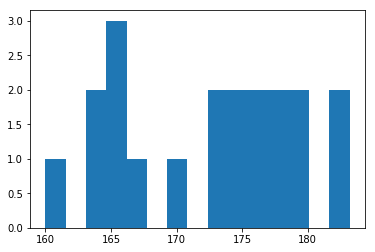

In [219]:
plt.hist(data[:,2], bins=15)

## Pandas 1

### Problem 1

In [173]:
index = np.linspace(0, 50, 26)
entries = index ** 2 - 1

In [174]:
s = pd.Series(entries, index=index)

In [175]:
s

0.0       -1.0
2.0        3.0
4.0       15.0
6.0       35.0
8.0       63.0
10.0      99.0
12.0     143.0
14.0     195.0
16.0     255.0
18.0     323.0
20.0     399.0
22.0     483.0
24.0     575.0
26.0     675.0
28.0     783.0
30.0     899.0
32.0    1023.0
34.0    1155.0
36.0    1295.0
38.0    1443.0
40.0    1599.0
42.0    1763.0
44.0    1935.0
46.0    2115.0
48.0    2303.0
50.0    2499.0
dtype: float64

In [176]:
s[s.index % 3 == 0] = 0
s

0.0        0.0
2.0        3.0
4.0       15.0
6.0        0.0
8.0       63.0
10.0      99.0
12.0       0.0
14.0     195.0
16.0     255.0
18.0       0.0
20.0     399.0
22.0     483.0
24.0       0.0
26.0     675.0
28.0     783.0
30.0       0.0
32.0    1023.0
34.0    1155.0
36.0       0.0
38.0    1443.0
40.0    1599.0
42.0       0.0
44.0    1935.0
46.0    2115.0
48.0       0.0
50.0    2499.0
dtype: float64

### Problem 2

In [199]:
def random_walk(p, d=100):
    days = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    s = np.zeros(len(days))
    s[0] = d
    c = [-1, 1]
    for i in range(1, len(days)):
        s[i] = s[i-1] + np.random.choice(c, p = [p, 1-p])
    s[s < 0] = 0
    return(pd.Series(s, index=days))

In [204]:
random_walk(.5, d=2)

2000-01-01     2.0
2000-01-02     1.0
2000-01-03     2.0
2000-01-04     1.0
2000-01-05     0.0
2000-01-06     0.0
2000-01-07     0.0
2000-01-08     1.0
2000-01-09     2.0
2000-01-10     1.0
2000-01-11     2.0
2000-01-12     1.0
2000-01-13     2.0
2000-01-14     3.0
2000-01-15     4.0
2000-01-16     3.0
2000-01-17     4.0
2000-01-18     5.0
2000-01-19     4.0
2000-01-20     3.0
2000-01-21     2.0
2000-01-22     1.0
2000-01-23     0.0
2000-01-24     0.0
2000-01-25     0.0
2000-01-26     0.0
2000-01-27     0.0
2000-01-28     1.0
2000-01-29     2.0
2000-01-30     1.0
2000-01-31     0.0
2000-02-01     1.0
2000-02-02     2.0
2000-02-03     1.0
2000-02-04     2.0
2000-02-05     1.0
2000-02-06     2.0
2000-02-07     3.0
2000-02-08     2.0
2000-02-09     1.0
2000-02-10     0.0
2000-02-11     0.0
2000-02-12     0.0
2000-02-13     0.0
2000-02-14     0.0
2000-02-15     0.0
2000-02-16     0.0
2000-02-17     0.0
2000-02-18     0.0
2000-02-19     0.0
2000-02-20     0.0
2000-02-21     0.0
2000-02-22  

In [206]:
random_walk(.9, d=100)

2000-01-01    100.0
2000-01-02     99.0
2000-01-03     98.0
2000-01-04     97.0
2000-01-05     96.0
2000-01-06     95.0
2000-01-07     94.0
2000-01-08     93.0
2000-01-09     92.0
2000-01-10     91.0
Freq: D, dtype: float64

In [207]:
random_walk(.1, d=100)

2000-01-01    100.0
2000-01-02    101.0
2000-01-03    102.0
2000-01-04    103.0
2000-01-05    104.0
2000-01-06    105.0
2000-01-07    104.0
2000-01-08    103.0
2000-01-09    104.0
2000-01-10    105.0
2000-01-11    106.0
2000-01-12    107.0
2000-01-13    108.0
2000-01-14    107.0
2000-01-15    108.0
2000-01-16    109.0
2000-01-17    110.0
2000-01-18    111.0
2000-01-19    112.0
2000-01-20    113.0
2000-01-21    114.0
2000-01-22    115.0
2000-01-23    116.0
2000-01-24    117.0
2000-01-25    118.0
2000-01-26    119.0
2000-01-27    120.0
2000-01-28    121.0
2000-01-29    122.0
2000-01-30    123.0
2000-01-31    124.0
2000-02-01    125.0
2000-02-02    126.0
2000-02-03    127.0
2000-02-04    128.0
2000-02-05    129.0
2000-02-06    130.0
2000-02-07    131.0
2000-02-08    132.0
2000-02-09    133.0
2000-02-10    134.0
2000-02-11    135.0
2000-02-12    136.0
2000-02-13    137.0
2000-02-14    138.0
2000-02-15    139.0
2000-02-16    138.0
2000-02-17    139.0
2000-02-18    140.0
2000-02-19    141.0


### Problem 3

In [208]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})

In [215]:
studentInfo.head()

,Age,Class,ID,Name,Sex
0,20,Sp,0,Mylan,M
1,21,Se,1,Regan,F
2,18,Fr,2,Justin,M
3,22,Se,3,Jess,F
4,19,Sp,4,Jason,M


In [219]:
# SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'
studentInfo[(studentInfo["Age"] > 19) & (studentInfo["Sex"] == "M")][["ID", "Name"]]

,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [221]:
# Using a join operation, create a DataFrame containing the ID, age, and GPA of all male individuals. 
pd.merge(otherInfo, studentInfo, on='ID')[studentInfo['Sex'] == "M"][['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


### Problem 5

In [231]:
# Load the data into a pandas DataFrame, using the column names in the file and the column 
# titled “Year” as the index. Make sure to skip lines that don’t contain data.
df = pd.read_csv("crime_data.txt", header=1, index_col="Year", skip_blank_lines=True)

In [232]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible-Rape,Robbery,Aggravated-assault,Burglary,Larcency-Theft,Vehicle-Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [233]:
#Insert a new column into the data frame that contains the crime rate by year 
# (the ratio of “Total” column to the “Population” column).
df["Crime-by-Year"] = df["Total"] / df["Population"]

In [263]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible-Rape,Robbery,Aggravated-assault,Burglary,Larcency-Theft,Vehicle-Theft,Crime-by-Year
Year,,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,0.018872
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,0.019061
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,0.020198
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,0.021803
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,0.023881


Text(0,0.5,'Crime Rate')

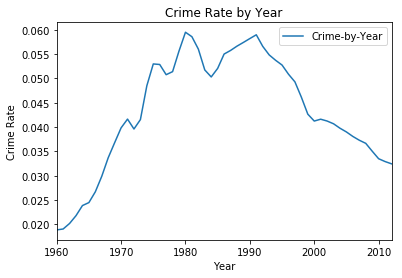

In [238]:
# Plot the crime rate as a function of the year.
df.plot(y="Crime-by-Year", title="Crime Rate by Year")
plt.ylabel("Crime Rate")

In [255]:
# List the 5 years with the highest crime rate in descending order.
df.sort_values("Crime-by-Year", ascending=False).head(5)["Crime-by-Year"]

Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Crime-by-Year, dtype: float64

In [264]:
# Check the dataset - see that it only goes to 2012, so no filtering by year necessary.
df.tail()

,Population,Total,Violent,Property,Murder,Forcible-Rape,Robbery,Aggravated-assault,Burglary,Larcency-Theft,Vehicle-Theft,Crime-by-Year
Year,,,,,,,,,,,,
2008,304374846,11160543,1392628,9767915,16442,90479,443574,842134,2228474,6588046,958629,0.036667
2009,307006550,10762956,1325896,9337060,15399,89241,408742,812514,2203313,6338095,795652,0.035058
2010,309330219,10363873,1251248,9112625,14772,85593,369089,781844,2168457,6204601,739565,0.033504
2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508,0.032924
2012,313914040,10189902,1214464,8975438,14827,84376,354522,760739,2103787,6150598,721053,0.032461


In [285]:
# Calculate the average number of total crimes as well as burglary crimes between 1960 and 2012.
df.loc[1960:2012][['Total', 'Burglary']].describe()

,Total,Burglary
count,5.300000e+01,5.300000e+01
mean,1.063807e+07,2.446286e+06
std,3.230843e+06,7.299596e+05
min,3.384200e+06,9.121000e+05
25%,8.718100e+06,2.116531e+06
50%,1.156550e+07,2.375500e+06
75%,1.319457e+07,3.073900e+06
max,1.487290e+07,3.795200e+06


In [268]:
# Find the years for which the total number of crimes was below average, 
# but the number of burglaries was above average.
df[(df.Total < 1.063807e07) & (df.Burglary > 2.446286e06)][["Total", "Burglary"]]

,Total,Burglary
Year,,
1973,8718100,2565500
1974,10253400,3039200


Text(0,0.5,'Murder Rate')

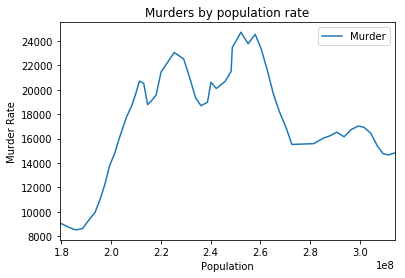

In [279]:
# Plot the number of murders as a function of the population.
df.plot(x="Population", y="Murder", title="Murders by population rate")
plt.ylabel("Murder Rate")

In [316]:
# Select the Population, Violent, and Robbery columns for all years in the 1980s, 
# and save this smaller data frame to a CSV file crime_subset.csv.
df2 = df.loc[1980:1989][["Population", "Violent", "Robbery"]]

In [317]:
df2.to_csv("crime_subset.csv")

### Problem 6

In [328]:
titanic = pd.read_csv("titanic.csv", header=0)
titanic.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [329]:
titanic = titanic.drop(labels=["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"], axis=1)

In [330]:
titanic = titanic.dropna(subset=["Survived"])

In [331]:
titanic.head()

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S


In [332]:
titanic["Survived"] = titanic["Survived"].astype(dtype=bool)

In [333]:
titanic.head()

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,True,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,False,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S


In [337]:
titanic["Age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [342]:
titanic["Age"] = titanic.Age.fillna(29.881135)

In [343]:
titanic.head()

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,True,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,False,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S


In [344]:
titanic.to_csv("titanic_clean.csv")

## Pandas 2

### Problem 1

In [51]:
# Visualize ratios of male to female births in London from 1629-1710
Arbuthnot = data("Arbuthnot")

In [52]:
Arbuthnot.head()

,Year,Males,Females,Plague,Mortality,Ratio,Total
1,1629,5218,4683,0,8771,1.114243,9.901
2,1630,4858,4457,1317,10554,1.089971,9.315
3,1631,4422,4102,274,8562,1.078011,8.524
4,1632,4994,4590,8,9535,1.088017,9.584
5,1633,5158,4839,0,8393,1.065923,9.997


In [53]:
Arbuthnot.columns

Index(['Year', 'Males', 'Females', 'Plague', 'Mortality', 'Ratio', 'Total'], dtype='object')

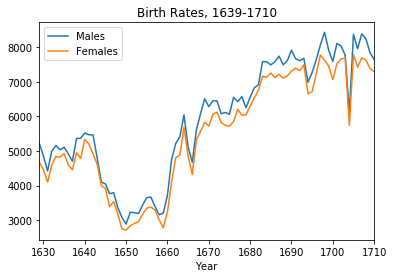

In [58]:
# Check the female vs. male birth trends over time
Arbuthnot.plot(x=["Year"], y=["Males", "Females"], title="Birth Rates, 1639-1710")

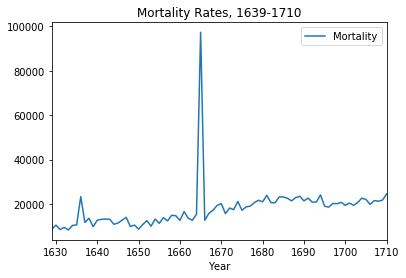

In [65]:
Arbuthnot.plot(x=["Year"], y=["Mortality"], title="Mortality Rates, 1639-1710")

In [66]:
# Find that year
Arbuthnot[Arbuthnot.Mortality > 40000]

,Year,Males,Females,Plague,Mortality,Ratio,Total
37,1665,5114,4858,68596,97306,1.052697,9.972


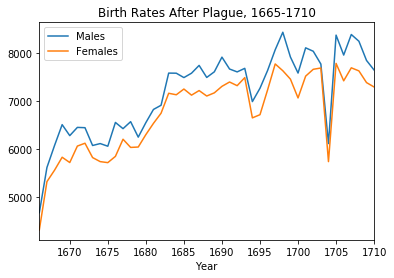

In [70]:
# Plot birth rates after that year.
Arbuthnot[Arbuthnot.Year > 1665].plot(x=["Year"], y=["Males", "Females"], title="Birth Rates After Plague, 1665-1710")

In [71]:
# Visualize road accident deaths in the United States
road = data("road")

In [73]:
road.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120293588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120712128>]], dtype=object)

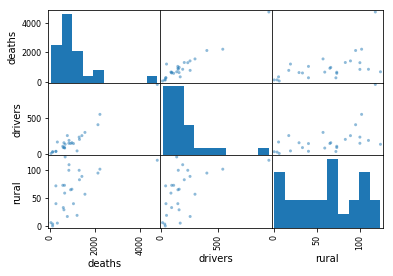

In [107]:
# See if there is a relationship between deaths, drivers, and rural population.
pd.plotting.scatter_matrix(road[["deaths", "drivers", "rural"]])

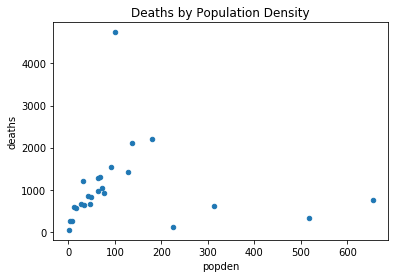

In [106]:
road[road.popden < 2000].plot(kind="scatter", x="popden", y="deaths", title="Deaths by Population Density")

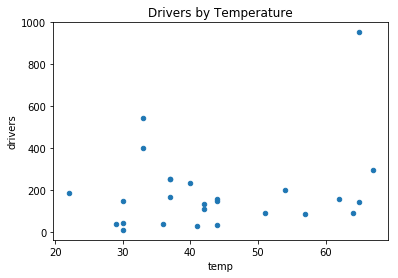

In [108]:
road.plot(kind="scatter", x="temp", y="drivers", title="Drivers by Temperature")

In [112]:
# Visualize girth, height and volume for black cherry trees
trees = data("trees")

In [113]:
trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


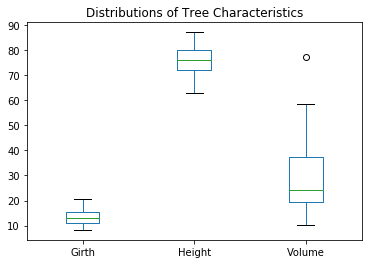

In [116]:
trees.plot(kind="box", y=["Girth", "Height", "Volume"], title="Distributions of Tree Characteristics")

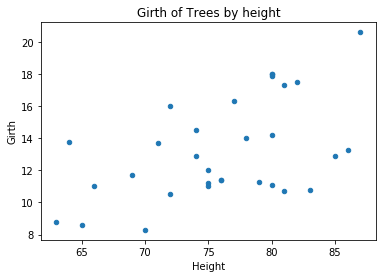

In [118]:
trees.plot(kind="scatter", x="Height", y="Girth", title="Girth of Trees by height")

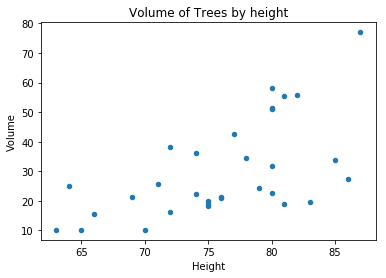

In [119]:
trees.plot(kind="scatter", x="Height", y="Volume", title="Volume of Trees by height")

In [120]:
# Visualize child breast feeding records
bfeed = data("bfeed")

In [121]:
bfeed.head()

,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
1,16,1,1,0,0,1,24,82,14,0
2,1,1,1,0,1,0,26,85,12,0
3,4,0,1,0,0,0,25,85,12,0
4,3,1,1,0,1,1,21,85,9,0
5,36,1,1,0,1,0,22,82,12,0


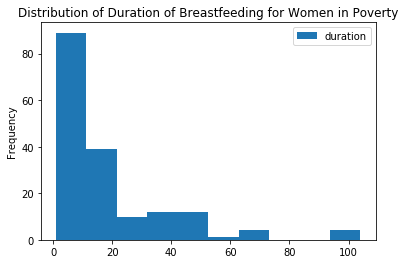

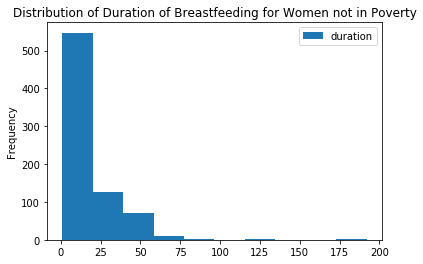

In [137]:
bfeed[bfeed.poverty == 1].plot(kind="hist", y="duration", title="Distribution of Duration of Breastfeeding for Women in Poverty")
bfeed[bfeed.poverty == 0].plot(kind="hist", y="duration", title="Distribution of Duration of Breastfeeding for Women not in Poverty")

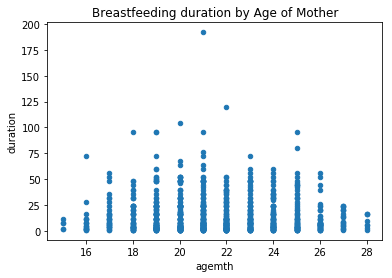

In [145]:
bfeed.plot(kind="scatter", x="agemth", y="duration", title="Breastfeeding duration by Age of Mother")

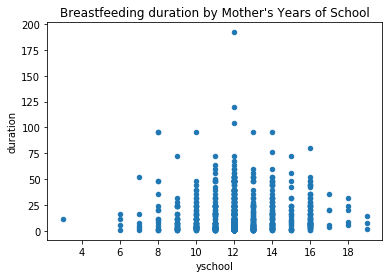

In [146]:
bfeed.plot(kind="scatter", x="yschool", y="duration", title="Breastfeeding duration by Mother's Years of School")

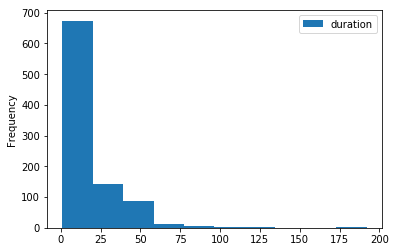

In [148]:
bfeed.plot(kind="hist", y="duration")

In [149]:
# Visualize risk factors associated with low infant birth weight
birthwt = data("birthwt")

In [150]:
birthwt.head()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600


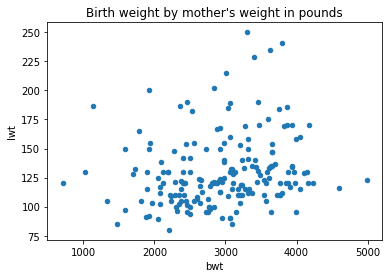

In [154]:
birthwt.plot(kind="scatter", x="bwt", y="lwt", title="Birth weight by mother's weight in pounds")

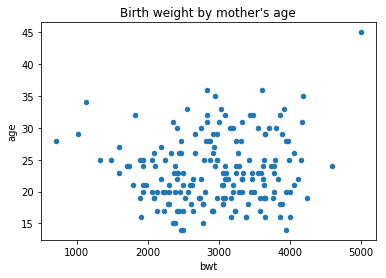

In [155]:
birthwt.plot(kind="scatter", x="bwt", y="age", title="Birth weight by mother's age")

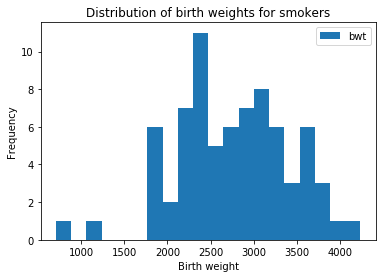

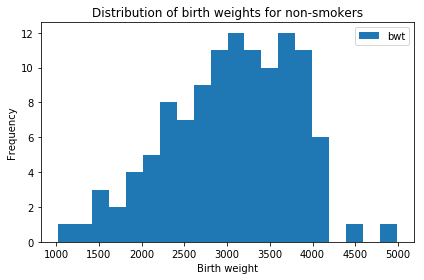

In [164]:
birthwt[birthwt.smoke == 1].plot(kind="hist", bins=20, y="bwt", title="Distribution of birth weights for smokers")
plt.xlabel("Birth weight")
birthwt[birthwt.smoke == 0].plot(kind="hist", bins=20, y="bwt", title="Distribution of birth weights for non-smokers")
plt.xlabel("Birth weight")
plt.tight_layout()

## Pandas 3

### Problem 1

In [4]:
iris = data("iris")

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


Text(0.5,1,'Iris Measurements')

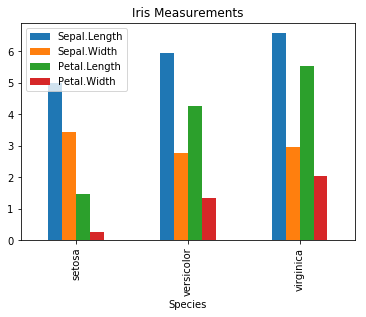

In [233]:
species = iris.groupby("Species")
species[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].mean().plot(kind="bar")
plt.title("Iris Measurements")

The setosa species is easiest to distinguish from the the others, because it has the smallest petal width and also has a petal length that is shorter than the sepal width, which is different from the others.

The strategy I could use is as follows:

    1. If petal length is shorter than the sepal width, iris type = setosa.
    2. If petal_length > 5, iris type = virginica, otherwise iris type = versicolor.

In [225]:
poisons = data("poisons")

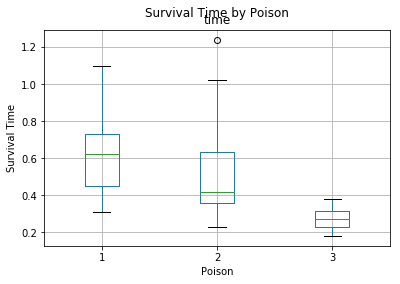

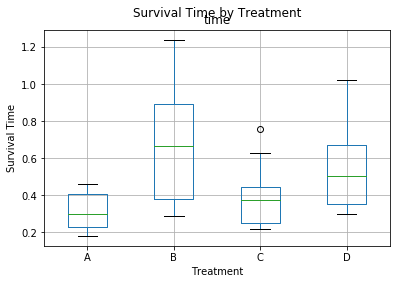

In [240]:
poisons.boxplot("time", by="poison")
plt.xlabel("Poison")
plt.ylabel("Survival Time")
plt.suptitle("Survival Time by Poison")
plt.show()

poisons.boxplot("time", by="treat")
plt.xlabel("Treatment")
plt.ylabel("Survival Time")
plt.suptitle("Survival Time by Treatment")
plt.show()

Poison 1 is the most deadly, and treatment B is the most effective.

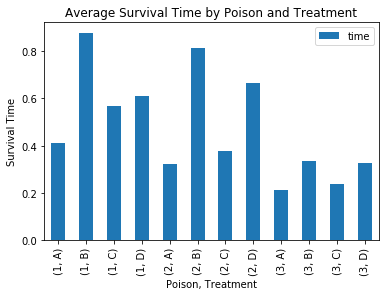

In [234]:
types = poisons.groupby(["poison", "treat"])
types[["time"]].mean().plot(kind="bar", title="Average Survival Time by Poison and Treatment")
plt.xlabel("Poison, Treatment")
plt.ylabel("Survival Time")
plt.show()

No matter the type of poison, I would choose treatment B, because it appears that it works the best across all poisons.

In [235]:
diamonds = data("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


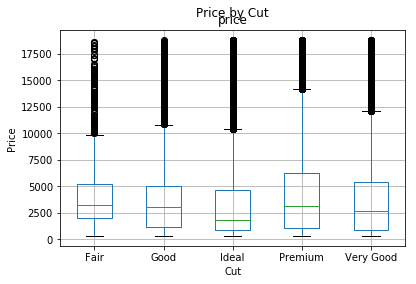

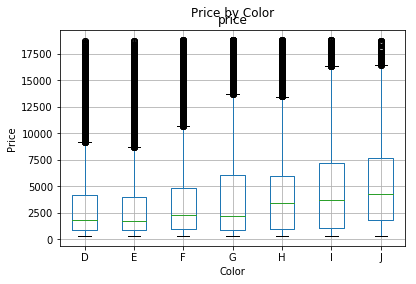

In [241]:
diamonds.boxplot("price", by="cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.suptitle("Price by Cut")
plt.show()

diamonds.boxplot("price", by="color")
plt.xlabel("Color")
plt.ylabel("Price")
plt.suptitle("Price by Color")
plt.show()

### Problem 2

In [248]:
titanic = pd.read_csv('titanic.csv', sep=",", header=0)
titanic.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [246]:
titanic.pivot_table(values="Survived", index="Embarked")

,Survived
Embarked,
C,0.555556
Q,0.357724
S,0.332604


In [247]:
titanic.pivot_table(values="Survived", index="Embarked", columns="Sex")

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


These results suggest that people embarking from C had the highest rate of survival, but that rate was much higher if they were female.

In [250]:
# Check rates by fare. 
fare = pd.qcut(titanic["Fare"], 4)
titanic.pivot_table(values="Survived", index=[fare], columns="Sex")

Sex,female,male
Fare,,
"(-0.001, 7.896]",0.602740,0.125000
"(7.896, 14.454]",0.602151,0.154185
"(14.454, 31.275]",0.683453,0.253968
"(31.275, 512.329]",0.894410,0.277778


This shows that people with high fares were much more likely to survive, especially females with high fares.

In [253]:
age = pd.cut(titanic['Age'], [0, 15, 30, 80])
titanic.pivot_table(values="Survived", index=[age], columns="Sex")

Sex,female,male
Age,,
"(0, 15]",0.660714,0.491525
"(15, 30]",0.720670,0.168254
"(30, 80]",0.823529,0.186620


Perhaps surprisingly, this shows that men were much more likely to survive when they were children, but women were actually less likely to survive when they were children.

## Pandas 4

### Problem 1

In [14]:
DJIA = pd.read_csv("DJIA.csv")
DJIA.head()

,DATE,VALUE
0,2006-09-27,11689.24
1,2006-09-28,11718.45
2,2006-09-29,11679.07
3,2006-10-02,11670.35
4,2006-10-03,11727.34


In [17]:
DJIA.set_index(pd.DatetimeIndex(DJIA['DATE']),inplace=True)
DJIA.dropna(axis=0,inplace=True)
DJIA.VALUE = pd.to_numeric(DJIA['VALUE'])

Text(0.5,1,'Dow Jones Industrial Average, 2006–2016')

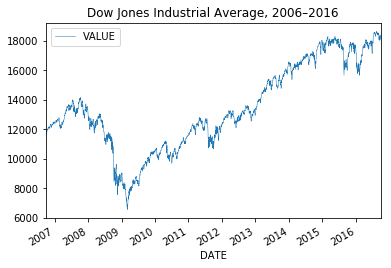

In [18]:
DJIA.plot(lw=0.5)
plt.title("Dow Jones Industrial Average, 2006–2016")

### Problem 2

In [19]:
pay = pd.read_csv("paychecks.csv", header=None)
pay.head()

,0
0,1122.26
1,921.03
2,962.46
3,1035.97
4,1078.59


In [22]:
pay.columns = ["paycheck"]
dt1 = pd.date_range('3/13/2008',freq="WOM-3FRI",periods=len(pay)).union\
    (pd.date_range('3/13/2008',freq="WOM-1FRI",periods=len(pay)))
pay.set_index(dt1[:len(pay)], inplace=True)
pay.head()

,paycheck
2008-03-21,1122.26
2008-04-04,921.03
2008-04-18,962.46
2008-05-02,1035.97
2008-05-16,1078.59


Text(0.5,1,"Hourly Employee's Paychecks over Time")

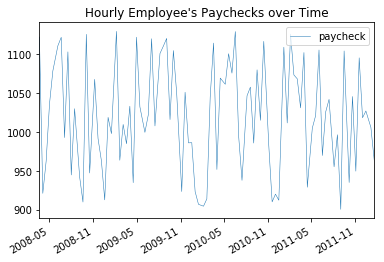

In [23]:
pay.plot(lw=0.5)
plt.title("Hourly Employee's Paychecks over Time")

### Problem 3

In [24]:
fin = pd.read_csv("finances.csv")
fin.head()

,EARNINGS,EXPENSES
0,372572.16,122611.27
1,419440.58,133176.18
2,419766.49,154670.69
3,361453.31,209360.42
4,354463.33,174147.13


Text(0.5,1,'Earnings and Expenses')

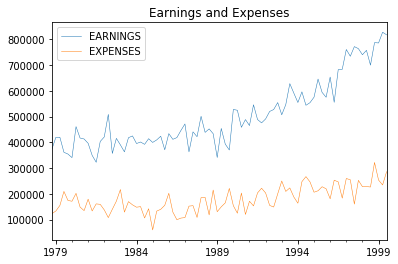

In [26]:
p = pd.period_range("1978-09", periods=len(fin),freq="Q-SEP")
fin.set_index(p, inplace=True)
fin.plot(lw=0.5)
plt.title('Earnings and Expenses')

### Problem 4

In [27]:
web = pd.read_csv("website_traffic.csv")
web.head()

,IP,ENTER,LEAVE
0,187.162.243.198,2016-10-07 01:01:01,2016-10-07 01:04:57
1,119.200.107.183,2016-10-07 01:01:01,2016-10-07 01:03:47
2,170.158.132.203,2016-10-07 01:01:06,2016-10-07 01:03:09
3,24.169.81.199,2016-10-07 01:01:18,2016-10-07 01:09:36
4,186.129.160.43,2016-10-07 01:01:20,2016-10-07 01:08:32


Text(0.5,1,'Minutes')

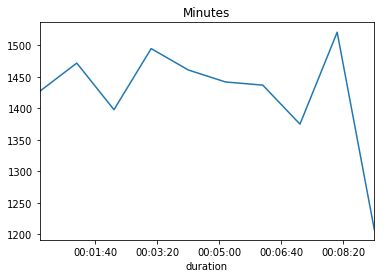

In [34]:
web['ENTER'] = pd.to_datetime(web['ENTER'],format="%Y-%m-%d %H:%M:%S")
web['LEAVE'] = pd.to_datetime(web['LEAVE'],format="%Y-%m-%d %H:%M:%S")
web['duration'] = web.LEAVE - web.ENTER
web.set_index(web['duration'], inplace=True)

minute = web.resample("T")
hour = web.resample("H")
minute.duration.agg(len).plot()
plt.title("Minutes")

### Problem 5

In [36]:
print(f"The single day with largest gain is {DJIA.VALUE.idxmax().strftime('%m/%d/%Y')}.")
print(f"The single day with largest loss is {DJIA.VALUE.idxmin().strftime('%m/%d/%Y')}.")
new = DJIA.resample("M")
temp = new.sum()
print(f"The single month with largest gain is {temp.VALUE.idxmax().strftime('%m/%Y')}.")
print(f"The single month with largest loss is {temp.VALUE.idxmin().strftime('%m/%Y')}.")

The single day with largest gain is 08/15/2016.
The single day with largest loss is 03/09/2009.
The single month with largest gain is 08/2016.
The single month with largest loss is 09/2006.


### Problem 6

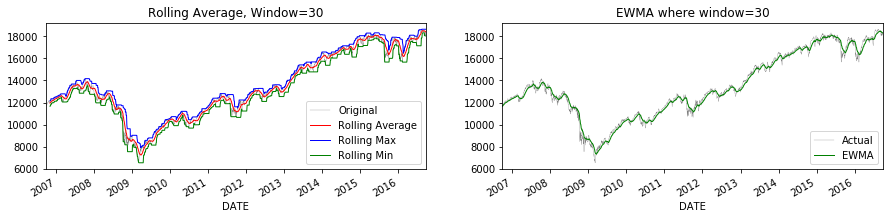

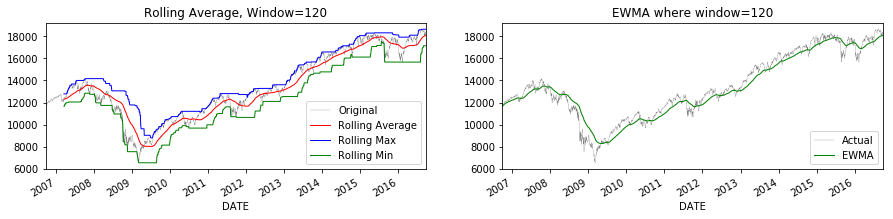

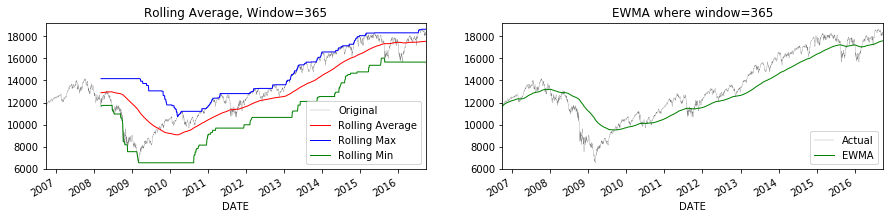

In [38]:
for t in [30, 120, 365]:

    f, axs = plt.subplots(1,2,figsize=(15,3))
    ax1,ax2=axs
    DJIA.plot(color="gray", lw=.3, ax=ax1)
    DJIA.rolling(window=t).mean().plot(color='r', lw=1, ax=ax1)
    DJIA.rolling(window=t).max().plot(color='b', lw=1, ax=ax1)
    DJIA.rolling(window=t).min().plot(color='g', lw=1, ax=ax1)
    ax1.legend(["Original", "Rolling Average", "Rolling Max", "Rolling Min"], loc="lower right")
    ax1.set_title(f"Rolling Average, Window={t}")
    
    DJIA.plot(color="gray", lw=.3, ax=ax2)
    DJIA.ewm(span=t).mean().plot(color='g', lw=1, ax=ax2)
    ax2.legend(["Actual", "EWMA"], loc="lower right")
    ax2.set_title(f"EWMA where window={t}")